## 국내유가와 국제유가의 상관관계 분석

In [37]:
import pandas as pd
import numpy as np
import re
import scipy as super
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [38]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [39]:
#국내유가 데이터 불러오기 
domestic_data = pd.read_csv('./data/부산시유가데이터_fillna.csv', encoding='utf-8', sep=',')
domestic_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638.0,1508.0
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638.0,1518.0
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668.0,1518.0
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678.0,1528.0
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678.0,1538.0


In [40]:
#국제유가 데이터 불러오기 
international_data = pd.read_csv('./data/기간별 환율(20220214-20220816).csv', encoding='utf-8', sep=',')
international_data.head()

,일자,매매기준율
0,20220816,"1,308.40상승2.40"
1,20220815,"1,306.00상승4.50"
2,20220814,"1,306.00상승4.50"
3,20220813,"1,306.00상승4.50"
4,20220812,"1,306.00상승4.50"


#### 매매기준율에서 환율만 추출하기

In [41]:
international_data["매매기준율"] = international_data["매매기준율"].apply(lambda x : re.split("[ㄱ-ㅣ가-힣]", x)).str.get(0).str.replace(",","").astype(float)
international_data.head(10)

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0
5,20220811,1301.5
6,20220810,1305.0
7,20220809,1306.0
8,20220808,1304.5
9,20220807,1299.5


In [42]:
international_data

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0
...,...,...
179,20220218,1195.0
180,20220217,1197.5
181,20220216,1196.5
182,20220215,1198.0


In [43]:
#날짜 오름차순으로 정리
international_data.sort_values(by=["일자","매매기준율"], inplace=True)
international_data

,일자,매매기준율
183,20220214,1197.0
182,20220215,1198.0
181,20220216,1196.5
180,20220217,1197.5
179,20220218,1195.0
...,...,...
4,20220812,1306.0
3,20220813,1306.0
2,20220814,1306.0
1,20220815,1306.0


In [44]:
#인덱스 정리
international_data = international_data.reset_index().drop(columns="index")
international_data

,일자,매매기준율
0,20220214,1197.0
1,20220215,1198.0
2,20220216,1196.5
3,20220217,1197.5
4,20220218,1195.0
...,...,...
179,20220812,1306.0
180,20220813,1306.0
181,20220814,1306.0
182,20220815,1306.0


In [45]:
# 두바이유가 데이터 불러오기
du = pd.read_csv("./data/국제유가(두바이).csv", encoding="cp949")
du.head(10)

,날짜,두바이_종가
0,20220809,95.97
1,20220808,96.04
2,20220807,94.41
3,20220806,94.41
4,20220805,94.41
5,20220804,94.08
6,20220803,95.97
7,20220802,99.40
8,20220801,97.87
9,20220731,101.52


In [46]:
#날짜 오름차순으로 정리
du.sort_values(by=["날짜","두바이_종가"], inplace=True)
du

,날짜,두바이_종가
176,20220214,92.61
175,20220215,90.86
174,20220216,91.56
173,20220217,90.67
172,20220218,90.90
...,...,...
4,20220805,94.41
3,20220806,94.41
2,20220807,94.41
1,20220808,96.04


In [47]:
#인덱스 정리
du = du.reset_index().drop(columns="index")
du.tail(10)

,날짜,두바이_종가
167,20220731,101.52
168,20220801,97.87
169,20220802,99.40
170,20220803,95.97
171,20220804,94.08
172,20220805,94.41
173,20220806,94.41
174,20220807,94.41
175,20220808,96.04
176,20220809,95.97


#### 두바이 유가, 국내 유가 합치기

In [48]:
# int64->object->datetime 타입변경
international_data["일자"] = pd.to_datetime(international_data["일자"].astype(str))
international_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      184 non-null    datetime64[ns]
 1   매매기준율   184 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [49]:
# object->datetime 타입변경
du["날짜"] = pd.to_datetime(du["날짜"].astype(str))
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      177 non-null    datetime64[ns]
 1   두바이_종가  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [50]:
# 두바이 유가, 국내 유가 합치기
int_du_price = pd.merge(international_data, du, left_on="일자", right_on="날짜")
int_du_price

,일자,매매기준율,날짜,두바이_종가
0,2022-02-14,1197.0,2022-02-14,92.61
1,2022-02-15,1198.0,2022-02-15,90.86
2,2022-02-16,1196.5,2022-02-16,91.56
3,2022-02-17,1197.5,2022-02-17,90.67
4,2022-02-18,1195.0,2022-02-18,90.90
...,...,...,...,...
172,2022-08-05,1299.5,2022-08-05,94.41
173,2022-08-06,1299.5,2022-08-06,94.41
174,2022-08-07,1299.5,2022-08-07,94.41
175,2022-08-08,1304.5,2022-08-08,96.04


In [51]:
#날짜 컬럼 삭제
int_du_price = int_du_price.drop(columns="날짜")
int_du_price

,일자,매매기준율,두바이_종가
0,2022-02-14,1197.0,92.61
1,2022-02-15,1198.0,90.86
2,2022-02-16,1196.5,91.56
3,2022-02-17,1197.5,90.67
4,2022-02-18,1195.0,90.90
...,...,...,...
172,2022-08-05,1299.5,94.41
173,2022-08-06,1299.5,94.41
174,2022-08-07,1299.5,94.41
175,2022-08-08,1304.5,96.04


1 bbl(배럴당) = 158.9ℓ(리터)

KRW /ℓ= (두바이유(w)*환율)/158.9ℓ

In [52]:
int_du_price['환전'] = int_du_price['두바이_종가'] * int_du_price['매매기준율'] / 158.9
int_du_price

,일자,매매기준율,두바이_종가,환전
0,2022-02-14,1197.0,92.61,697.634802
1,2022-02-15,1198.0,90.86,685.023789
2,2022-02-16,1196.5,91.56,689.437004
3,2022-02-17,1197.5,90.67,683.306010
4,2022-02-18,1195.0,90.90,683.609188
...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.094368
173,2022-08-06,1299.5,94.41,772.094368
174,2022-08-07,1299.5,94.41,772.094368
175,2022-08-08,1304.5,96.04,788.446696


In [53]:
int_du_price['환전'] = int_du_price['환전'].round(1)
int_du_price

,일자,매매기준율,두바이_종가,환전
0,2022-02-14,1197.0,92.61,697.6
1,2022-02-15,1198.0,90.86,685.0
2,2022-02-16,1196.5,91.56,689.4
3,2022-02-17,1197.5,90.67,683.3
4,2022-02-18,1195.0,90.90,683.6
...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.1
173,2022-08-06,1299.5,94.41,772.1
174,2022-08-07,1299.5,94.41,772.1
175,2022-08-08,1304.5,96.04,788.4


In [54]:
domestic_data.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '휘발유', '경유'], dtype='object')

In [55]:
# object->datetime 타입변경
domestic_data["기간"] = pd.to_datetime(domestic_data["기간"].astype(str))
domestic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67234 entries, 0 to 67233
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      67234 non-null  object        
 1   지역      67234 non-null  object        
 2   상호      67234 non-null  object        
 3   주소      67234 non-null  object        
 4   기간      67234 non-null  datetime64[ns]
 5   상표      67234 non-null  object        
 6   셀프여부    67234 non-null  object        
 7   휘발유     67234 non-null  float64       
 8   경유      67234 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 4.6+ MB


In [56]:
domestic_price = domestic_data.groupby(['기간'])[['휘발유','경유']].mean().round(1)
domestic_price

,휘발유,경유
기간,,
2022-02-14,1681.6,1513.2
2022-02-15,1686.4,1517.1
2022-02-16,1692.5,1522.9
2022-02-17,1697.0,1529.0
2022-02-18,1699.5,1532.2
...,...,...
2022-08-05,1831.1,1923.1
2022-08-06,1825.3,1917.6
2022-08-07,1823.2,1915.7


In [57]:
# 두바이 유가, 휘발유가, 경유가 합치기
oil_price = pd.merge(int_du_price, domestic_price, left_on="일자", right_on="기간")
oil_price.tail(20)

,일자,매매기준율,두바이_종가,환전,휘발유,경유
157,2022-07-21,1312.0,102.55,846.7,1959.4,2028.8
158,2022-07-22,1313.0,102.32,845.5,1947.1,2018.0
159,2022-07-23,1313.0,102.32,845.5,1934.2,2007.0
160,2022-07-24,1313.0,102.32,845.5,1931.0,2004.4
161,2022-07-25,1310.5,98.13,809.3,1925.0,1999.0
162,2022-07-26,1308.0,97.48,802.4,1909.8,1983.1
163,2022-07-27,1314.0,99.27,820.9,1898.0,1972.9
164,2022-07-28,1301.5,99.70,816.6,1889.6,1966.5
165,2022-07-29,1303.5,101.52,832.8,1881.5,1962.0
166,2022-07-30,1303.5,101.52,832.8,1876.9,1958.2


In [58]:
#컬럼명 변경
oil_price.rename(columns={"환전" : "원유"}, inplace=True)
oil_price

,일자,매매기준율,두바이_종가,원유,휘발유,경유
0,2022-02-14,1197.0,92.61,697.6,1681.6,1513.2
1,2022-02-15,1198.0,90.86,685.0,1686.4,1517.1
2,2022-02-16,1196.5,91.56,689.4,1692.5,1522.9
3,2022-02-17,1197.5,90.67,683.3,1697.0,1529.0
4,2022-02-18,1195.0,90.90,683.6,1699.5,1532.2
...,...,...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.1,1831.1,1923.1
173,2022-08-06,1299.5,94.41,772.1,1825.3,1917.6
174,2022-08-07,1299.5,94.41,772.1,1823.2,1915.7
175,2022-08-08,1304.5,96.04,788.4,1813.1,1905.8


In [59]:
oil_price = oil_price.drop(columns=['매매기준율','두바이_종가'])
oil_price

,일자,원유,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2
...,...,...,...,...
172,2022-08-05,772.1,1831.1,1923.1
173,2022-08-06,772.1,1825.3,1917.6
174,2022-08-07,772.1,1823.2,1915.7
175,2022-08-08,788.4,1813.1,1905.8


In [60]:
oil_price.head(20)

,일자,원유,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2
5,2022-02-19,683.6,1702.0,1535.1
6,2022-02-20,683.6,1703.5,1535.9
7,2022-02-21,681.9,1705.9,1538.6
8,2022-02-22,690.3,1709.3,1543.0
9,2022-02-23,690.8,1711.9,1545.9


In [61]:
oil_price.to_csv('./data/유가전처리.csv', encoding='utf-8', index=False)

In [62]:
oil_price_corr = oil_price.corr(method='pearson')
oil_price_corr

,원유,휘발유,경유
원유,1.000000,0.702527,0.677799
휘발유,0.702527,1.000000,0.909750
경유,0.677799,0.909750,1.000000


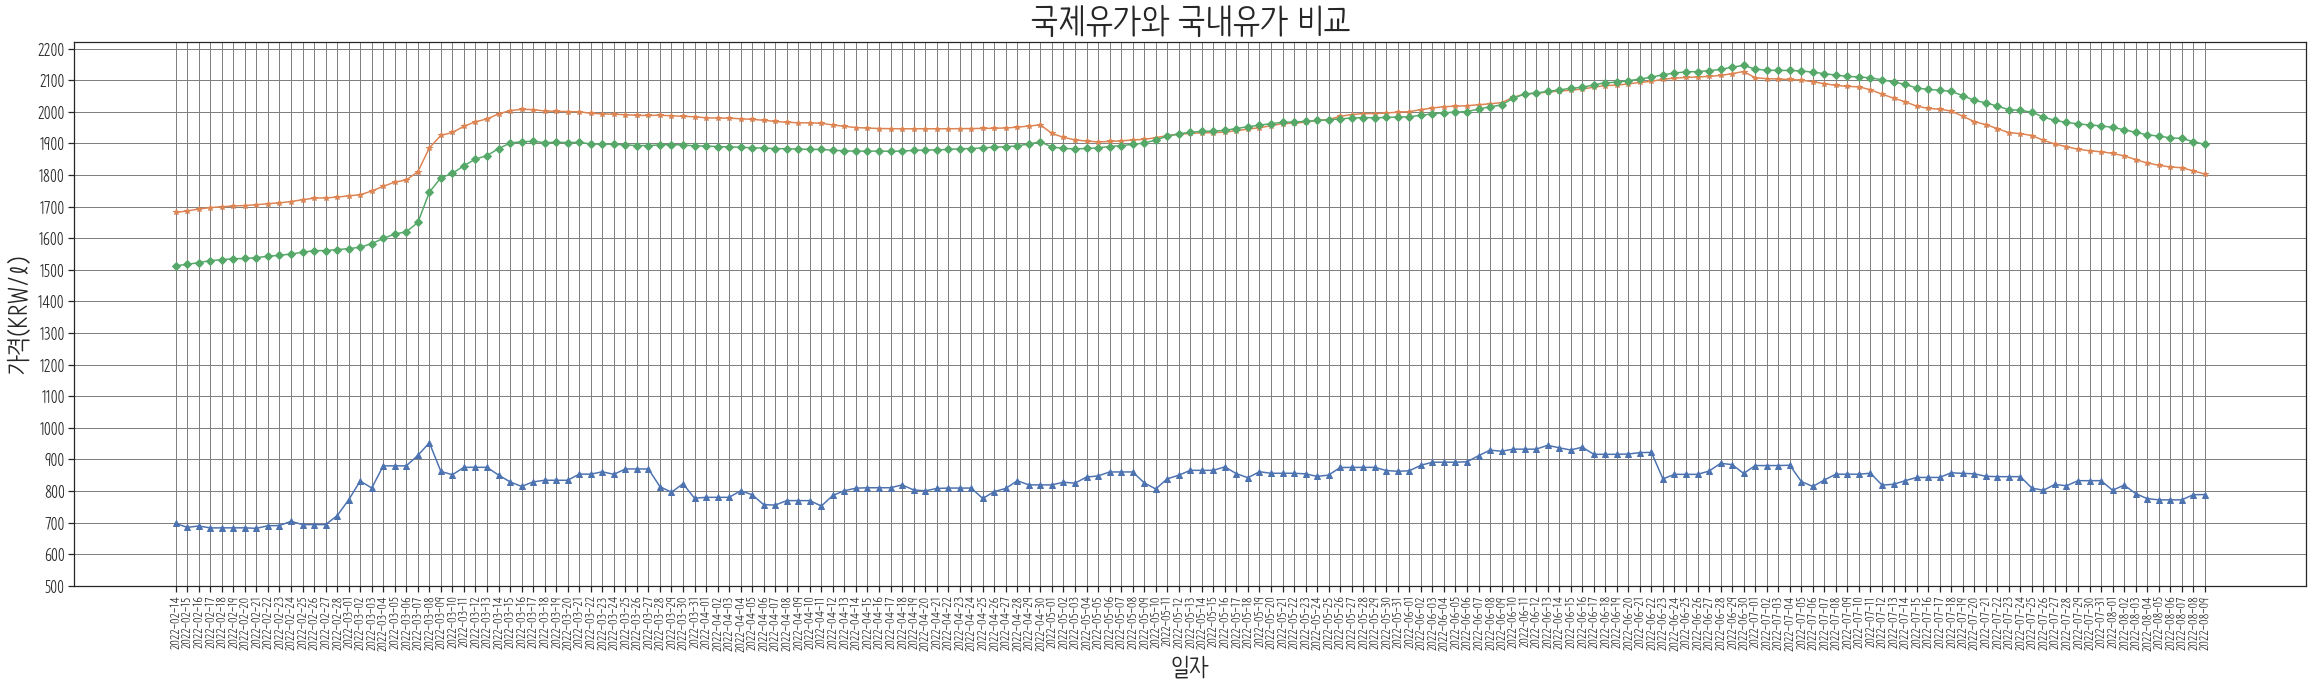

In [63]:
ax1 = oil_price.일자
ax2 = oil_price.원유
ax3 = oil_price.휘발유
ax4 = oil_price.경유

plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="원유 가격", marker="^") # 원유 가격
b = plt.plot(ax1, ax3, label="휘발유 평균 가격", marker="*") # 휘발유 평균 가격
c = plt.plot(ax1, ax4, label="경유 평균 가격", marker="D") # 경유 평균 가격
p = [a,b,c]


plt.title("국제유가와 국내유가 비교", fontsize=35)
plt.xticks(ax1, fontsize=12, rotation=90) # x축
plt.yticks(np.arange(500, 2300, 100) ,fontsize=15) # y축
plt.xlabel("일자", fontsize=25) #x 축 이름
plt.ylabel("가격(KRW/ℓ)", fontsize=25) # y축 이름
#plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid(color="grey")


plt.show()

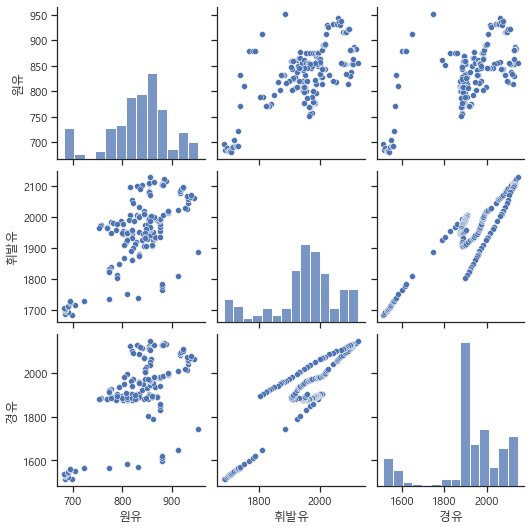

In [66]:
sns.set(style='ticks', color_codes=True)
plt.rcParams["font.family"] = "Malgun Gothic" #폰트 적용
sns.pairplot(oil_price)
plt.show()

##### 원유의 가격과 휘발유/원유 가격은 대체적으로 양의 관계가 보인다(상관계수로 설명)

- 원유-휘발유:0.683768, 원유-경유 : 0.656538 => 다소 높음

##### 휘발유와 경유 가격이 양의관계로 올라가다, 우크라이나 전쟁으로 인해 경유 가격이 휘발유 가격을 역전하면서 음의 관계로 바뀌었다.

- 휘발유-경유 : 0.906916 => 아주 높음

In [72]:
from PIL import Image

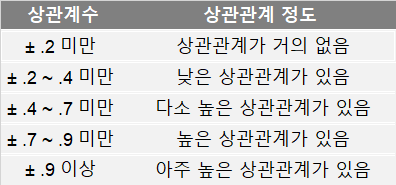

In [74]:
image = Image.open('./data/상관계수 정도.png')
image